In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd

# Load the Public Debt(Target) and Factor Datasets
df_debt = pd.read_csv('/content/drive/MyDrive/Capstone Data/YOY/Cleaned_Public_Debt_Yoy.csv')
df_export = pd.read_csv('/content/drive/MyDrive/Capstone Data/YOY/Cleaned_Export_Yoy.csv')
df_import = pd.read_csv('/content/drive/MyDrive/Capstone Data/YOY/Cleaned_Import_Yoy.csv')
df_GDP = pd.read_csv('/content/drive/MyDrive/Capstone Data/YOY/Cleaned_National_GDP_Yoy.csv')
df_pop = pd.read_csv('/content/drive/MyDrive/Capstone Data/YOY/Cleaned_Pop_Growth.csv')
df_labor = pd.read_csv('/content/drive/MyDrive/Capstone Data/YOY/Cleaned_Labor_Force_Yoy.csv')
df_unemployment = pd.read_csv('/content/drive/MyDrive/Capstone Data/YOY/Cleaned_Unemployment_Yoy.csv')
df_acct = pd.read_csv('/content/drive/MyDrive/Capstone Data/YOY/Cleaned_current_account_yoy.csv')
df_inflation = pd.read_csv('/content/drive/MyDrive/Capstone Data/YOY/clean_inflation_rate (2).csv')
df_wage = pd.read_csv('/content/drive/MyDrive/Capstone Data/YOY/Average_Wage_Data_YoY.csv')

In [31]:
# A little bit of data cleaning that wasn't done before
datasets = {
    'Public_Debt': df_debt,
    'Exports': df_export,
    'GDP': df_GDP,
    'Imports': df_import,
    'Population': df_pop,
    'Unemployment': df_unemployment,
    'Labor_Force': df_labor,
    'Current_Account': df_acct,
    'Inflation': df_inflation,
    'wage': df_wage
}

#Set first column to "Country" for each dataset
#Ensuring that "Country" is the same across all datasets
for factor, df in datasets.items():
    df.columns = ['Country'] + df.columns[1:].tolist()
    datasets[factor] = df

#Check if Turkey, Czech Republic, and Korea are in each dataset
required_countries = ["Turkey", "Czech Republic", "Korea"]
for factor, df in datasets.items():
    missing = [country for country in required_countries if country not in df['Country'].values]
    if missing:
        print(f"Missing in {factor}: {missing}")
    else:
        print(f"All required countries present in {factor}")

All required countries present in Public_Debt
All required countries present in Exports
Missing in GDP: ['Turkey', 'Czech Republic', 'Korea']
All required countries present in Imports
All required countries present in Population
All required countries present in Unemployment
All required countries present in Labor_Force
All required countries present in Current_Account
Missing in Inflation: ['Czech Republic']
Missing in wage: ['Turkey', 'Czech Republic']


In [32]:
#Divide the wage dataset by 100 to get it into decimal format
for year in map(str, range(2010, 2024)):
    df_wage[year] = df_wage[year] / 100

df_wage.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Australia,0.007378,0.042494,0.039433,0.114802,0.019873,0.001885,0.032835,-0.003026,0.034308,0.016798,0.053797,0.026720,0.051056,0.040028
1,Austria,0.019563,0.044341,0.047936,0.051675,0.018630,0.025605,0.055370,0.023145,0.036236,0.050357,0.018081,0.014124,0.092985,0.044204
2,Belgium,0.046833,0.033747,0.040225,0.026724,0.012978,0.000872,0.025391,0.028552,0.035847,0.050542,0.033216,0.011320,0.090947,0.071702
3,Canada,0.002737,-0.004530,0.001253,0.056010,0.031738,0.005762,0.027660,0.024677,0.025754,-0.018553,0.109389,0.038692,0.056806,0.077309
4,Chile,0.020225,0.089519,0.073858,0.054590,0.012070,0.010693,0.042100,0.040372,0.038130,0.024647,-0.017297,0.009421,0.077510,0.097224


In [33]:
#Repalce countries in the GDP dataset with correct spellings
datasets['GDP']['Country'] = datasets['GDP']['Country'].replace('Korea, Rep.', 'Korea')
datasets['GDP']['Country'] = datasets['GDP']['Country'].replace('Turkiye', 'Turkey')
datasets['GDP']['Country'] = datasets['GDP']['Country'].replace('Czechia', 'Czech Republic')

In [34]:
datasets['Inflation']['Country'] = datasets['Inflation']['Country'].replace('Czechia', 'Czech Republic')

In [35]:
import numpy as np

#Define Euro vs. non-Euro countries
european_oecd_countries = [
    "Austria", "Belgium", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
    "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg",
    "Netherlands", "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden",
    "Switzerland", "United Kingdom"
]
non_european_oecd_countries = [
    "Australia", "Canada", "Chile", "Colombia", "Israel", "Japan", "Korea", "Mexico", "New Zealand",
    "Turkey", "United States"]

datasets = {
    'Public_Debt': df_debt,
    'Exports': df_export,
    'GDP': df_GDP,
    'Imports': df_import,
    'Population': df_pop,
    'Unemployment': df_unemployment,
    'Labor_Force': df_labor,
    'Current_Account': df_acct,
    'Inflation': df_inflation,
    'Wage': df_wage}

In [36]:
import pandas as pd
import numpy as np

# Define weights from correlations for normal period (2014-2019)
weights = {
    'European': {
        'Wage': -0.18,
        'Exports': -0.179,
        'GDP': -0.16,
        'Imports': -0.1667,
        'Population': -0.26,
        'Unemployment': 0.2259,
        'Labor_Force': -0.32,
        'Current_Account': 0.0,
        'Inflation': -0.21
    },
    'Non_European': {
        'Wage': 0.0,
        'Exports': -0.1872,
        'GDP': -0.384,
        'Imports': -0.36,
        'Population': 0.0,
        'Unemployment': 0.27,
        'Labor_Force': 0.0,
        'Current_Account': 0.0,
        'Inflation': -0.2342
    }
}

# Normalize weights to sum to 1 (absolute values) while preserving signs
def normalize_weights(weights_dict):
    normalized_weights = {}
    for group in weights_dict:
        period_weights = weights_dict[group]
        # Sum of absolute weights (excluding Public_Debt if present)
        total = sum(abs(v) for k, v in period_weights.items() if k != 'Public_Debt')
        if total > 0:
            normalized_weights[group] = {
                k: v / total if k != 'Public_Debt' else 0 for k, v in period_weights.items()
            }
        else:
            # Assign equal positive weights if sum of absolute weights is zero
            valid_factors = [k for k in period_weights if k != 'Public_Debt']
            equal_weight = 1.0 / len(valid_factors) if valid_factors else 0
            normalized_weights[group] = {
                k: equal_weight if k != 'Public_Debt' else 0 for k in period_weights
            }
    return normalized_weights

# Apply normalization
normalized_weights = normalize_weights(weights)

# Print normalized weights for verification
print("\nNormalized Weights for Normal Period (2014-2019):")
for group in normalized_weights:
    print(f"{group}:")
    print({k: f"{v:.4f}" for k, v in normalized_weights[group].items()})
    abs_sum = sum(abs(v) for k, v in normalized_weights[group].items() if k != 'Public_Debt')
    print(f"Sum of absolute weights: {abs_sum:.4f}")
    signed_sum = sum(v for k, v in normalized_weights[group].items() if k != 'Public_Debt')
    print(f"Sum of signed weights: {signed_sum:.4f}\n")


Normalized Weights for Normal Period (2014-2019):
European:
{'Wage': '-0.1058', 'Exports': '-0.1052', 'GDP': '-0.0940', 'Imports': '-0.0980', 'Population': '-0.1528', 'Unemployment': '0.1328', 'Labor_Force': '-0.1881', 'Current_Account': '0.0000', 'Inflation': '-0.1234'}
Sum of absolute weights: 1.0000
Sum of signed weights: -0.7345

Non_European:
{'Wage': '0.0000', 'Exports': '-0.1304', 'GDP': '-0.2675', 'Imports': '-0.2508', 'Population': '0.0000', 'Unemployment': '0.1881', 'Labor_Force': '0.0000', 'Current_Account': '0.0000', 'Inflation': '-0.1632'}
Sum of absolute weights: 1.0000
Sum of signed weights: -0.6238



In [37]:
## Attempt 1: Using Averages for normal years (2014-2019)
#Convert 2010-2023 actual data to long format and merge
df_actual = None
for factor, df in datasets.items():
    df_long = df.melt(id_vars=["Country"], var_name="Year", value_name=factor)
    df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
    df_long[factor] = pd.to_numeric(df_long[factor], errors='coerce')
    df_long = df_long[df_long["Year"].between(2010, 2023)].dropna(subset=[factor])

    if df_actual is None:
        df_actual = df_long
    else:
        df_actual = pd.merge(df_actual, df_long[['Country', 'Year', factor]],
                            on=['Country', 'Year'], how='inner')

#Extract 2014-2019 (normal period) to calculate average YoY growth rates
df_normal = df_actual[df_actual["Year"].between(2014, 2019)]

#Calculate average YoY growth rate (2014-2019) for each country
avg_yoy_growth_rates = {}
countries = df_actual['Country'].unique()
for country in countries:
    avg_yoy_growth_rates[country] = {}
    country_normal = df_normal[df_normal['Country'] == country]
    for factor in datasets.keys():
        avg_yoy = country_normal[factor].mean()
        avg_yoy_growth_rates[country][factor] = avg_yoy if not np.isnan(avg_yoy) else np.nan

#Project synthetic Normal 2024-2030 for all factors (including Public_Debt growth rate)
synthetic_data = []
for country in countries:
    country_2023 = df_actual[(df_actual['Country'] == country) &
                            (df_actual['Year'] == 2023)]
    if country_2023.empty:
        print(f"Skipping {country}: No 2023 data available")
        continue
    if country in european_oecd_countries:
        group = 'European'
    else:
        group = 'Non_European'
    group_weights = normalized_weights[group]

    #Compute Public_Debt growth rate using weighted average YoY growth rates
    public_debt_growth_rate = 0
    for factor in datasets.keys():
        if factor == 'Public_Debt':
            continue
        weight = group_weights[factor]
        avg_yoy = avg_yoy_growth_rates[country].get(factor, np.nan)
        if not np.isnan(avg_yoy):
            public_debt_growth_rate += weight * avg_yoy

    for year in range(2020, 2031):
        row = {'Country': country, 'Year': year}
        for factor in datasets.keys():
            if factor == 'Public_Debt':
                row[factor] = public_debt_growth_rate if not np.isnan(public_debt_growth_rate) else np.nan
            else:
                avg_yoy = avg_yoy_growth_rates[country].get(factor, np.nan)
                row[factor] = avg_yoy if not np.isnan(avg_yoy) else np.nan
        synthetic_data.append(row)

df_synthetic_avg = pd.DataFrame(synthetic_data)

In [38]:
print("\nRanking of Countries by Projected Public_Debt YoY Growth Rate (2024-2030):")
ranking_data = df_synthetic_avg[df_synthetic_avg['Year'] == 2024][['Country', 'Public_Debt']]
ranking_data = ranking_data.rename(columns={'Public_Debt': 'Public_Debt_Growth_Rate'})
ranking_data = ranking_data.dropna()
ranking_data = ranking_data.sort_values(by='Public_Debt_Growth_Rate', ascending=False)
ranking_data['Rank'] = ranking_data['Public_Debt_Growth_Rate'].rank(ascending=False, method='min').astype(int)
ranking_data = ranking_data[['Rank', 'Country', 'Public_Debt_Growth_Rate']]
ranking_data['Public_Debt_Growth_Rate'] = ranking_data['Public_Debt_Growth_Rate'].apply(lambda x: f"{x*100:.2f}%")
print(ranking_data.to_string(index=False))


Ranking of Countries by Projected Public_Debt YoY Growth Rate (2024-2030):
 Rank         Country Public_Debt_Growth_Rate
    1        Colombia                   0.94%
    2           Chile                   0.46%
    3          Norway                   0.37%
    4       Australia                  -0.03%
    5     Switzerland                  -0.69%
    6          Canada                  -0.85%
    7           Italy                  -0.90%
    8           Korea                  -0.93%
    9          France                  -1.03%
   10         Finland                  -1.10%
   11          Sweden                  -1.15%
   12          Greece                  -1.38%
   13         Austria                  -1.56%
   14           Japan                  -1.90%
   15         Denmark                  -1.90%
   16      Costa Rica                  -1.95%
   17         Belgium                  -2.01%
   18           Spain                  -2.11%
   19         Germany                  -2.17%
   2

In [39]:
## Attempt 2: Linear Regression
#Same thing but now using linear regression instead of averages

from sklearn.linear_model import LinearRegression

#Convert 2010-2023 actual data to long format and merge
df_actual = None
for factor, df in datasets.items():
    df_long = df.melt(id_vars=["Country"], var_name="Year", value_name=factor)
    df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
    df_long[factor] = pd.to_numeric(df_long[factor], errors='coerce')
    df_long = df_long[df_long["Year"].between(2010, 2023)].dropna(subset=[factor])

    if df_actual is None:
        df_actual = df_long
    else:
        df_actual = pd.merge(df_actual, df_long[['Country', 'Year', factor]],
                            on=['Country', 'Year'], how='inner')

#Extract 2014-2019 (normal period) to estimate YoY growth rates using linear regression
df_normal = df_actual[df_actual["Year"].between(2014, 2019)]

# Calculate regression-based YoY growth rate (2014-2019) for each country
reg_yoy_growth_rates = {}
countries = df_actual['Country'].unique()
for country in countries:
    reg_yoy_growth_rates[country] = {}
    country_normal = df_normal[df_normal['Country'] == country]

    for factor in datasets.keys():
        # Prepare data for regression
        factor_data = country_normal[['Year', factor]].dropna()
        if len(factor_data) < 2:
            reg_yoy_growth_rates[country][factor] = np.nan
            continue

        X = factor_data['Year'].values.reshape(-1, 1)
        y = factor_data[factor].values

        # Fit linear regression
        model = LinearRegression()
        model.fit(X, y)

        # Use the predicted growth rate for 2019 as the representative rate
        predicted_rate = model.predict([[2019]])[0]
        reg_yoy_growth_rates[country][factor] = predicted_rate if not np.isnan(predicted_rate) else np.nan

#Project synthetic Normal 2024-2030 for all factors (including Public_Debt growth rate)
synthetic_data = []
for country in countries:
    country_2023 = df_actual[(df_actual['Country'] == country) &
                            (df_actual['Year'] == 2023)]
    if country_2023.empty:
        print(f"Skipping {country}: No 2023 data available")
        continue

    if country in european_oecd_countries:
        group = 'European'
    else:
        group = 'Non_European'

    # Get weights for this group
    group_weights = normalized_weights[group]

    # Compute Public_Debt growth rate using weighted regression-based YoY growth rates
    public_debt_growth_rate = 0
    for factor in datasets.keys():
        if factor == 'Public_Debt':
            continue
        weight = group_weights[factor]
        reg_yoy = reg_yoy_growth_rates[country].get(factor, np.nan)
        if not np.isnan(reg_yoy):
            public_debt_growth_rate += weight * reg_yoy

    for year in range(2020, 2031):
        row = {'Country': country, 'Year': year}
        for factor in datasets.keys():
            if factor == 'Public_Debt':
                row[factor] = public_debt_growth_rate if not np.isnan(public_debt_growth_rate) else np.nan
            else:
                # Use the regression-based growth rate for other factors
                reg_yoy = reg_yoy_growth_rates[country].get(factor, np.nan)
                row[factor] = reg_yoy if not np.isnan(reg_yoy) else np.nan
        synthetic_data.append(row)

df_synthetic_linear = pd.DataFrame(synthetic_data)

In [40]:
print("\nRanking of Countries by Projected Public_Debt YoY Growth Rate (2024-2030):")
ranking_data = df_synthetic_linear[df_synthetic_linear['Year'] == 2024][['Country', 'Public_Debt']]
ranking_data = ranking_data.rename(columns={'Public_Debt': 'Public_Debt_Growth_Rate'})
ranking_data = ranking_data.dropna()
ranking_data = ranking_data.sort_values(by='Public_Debt_Growth_Rate', ascending=False)
ranking_data['Rank'] = ranking_data['Public_Debt_Growth_Rate'].rank(ascending=False, method='min').astype(int)
ranking_data = ranking_data[['Rank', 'Country', 'Public_Debt_Growth_Rate']]
ranking_data['Public_Debt_Growth_Rate'] = ranking_data['Public_Debt_Growth_Rate'].apply(lambda x: f"{x*100:.2f}%")
print(ranking_data.to_string(index=False))


Ranking of Countries by Projected Public_Debt YoY Growth Rate (2024-2030):
 Rank         Country Public_Debt_Growth_Rate
    1      Costa Rica                   0.14%
    2         Iceland                   0.05%
    3           Korea                  -1.64%
    4          Sweden                  -2.09%
    5     Switzerland                  -2.24%
    6           Italy                  -2.31%
    7        Colombia                  -2.42%
    8  United Kingdom                  -2.45%
    9          France                  -3.04%
   10           Chile                  -3.10%
   11          Norway                  -3.31%
   12         Denmark                  -3.34%
   13         Germany                  -3.40%
   14           Spain                  -3.54%
   15      Luxembourg                  -3.54%
   16         Austria                  -4.00%
   17   United States                  -4.01%
   18          Mexico                  -4.08%
   19     New Zealand                  -4.17%
   2

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Step 1: Convert 2010-2023 actual data to long format and merge
df_actual = None
for factor, df in datasets.items():
    df_long = df.melt(id_vars=["Country"], var_name="Year", value_name=factor)
    df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
    df_long[factor] = pd.to_numeric(df_long[factor], errors='coerce')
    df_long = df_long[df_long["Year"].between(2010, 2023)].dropna(subset=[factor])

    if df_actual is None:
        df_actual = df_long
    else:
        df_actual = pd.merge(df_actual, df_long[['Country', 'Year', factor]],
                            on=['Country', 'Year'], how='inner')

#Extract 2014-2019 (normal period) to estimate YoY growth rates
df_normal = df_actual[df_actual["Year"].between(2014, 2019)]

# Calculate YoY growth rates using selected method
est_yoy_growth_rates = {}
countries = df_actual['Country'].unique()

#Quadratic Regression
polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
for country in countries:
    est_yoy_growth_rates[country] = {}
    country_normal = df_normal[df_normal['Country'] == country]

    for factor in datasets.keys():
        factor_data = country_normal[['Year', factor]].dropna()
        if len(factor_data) < 3:  # Need at least 3 points for quadratic
            est_yoy_growth_rates[country][factor] = np.nan
            continue

        X = factor_data['Year'].values.reshape(-1, 1)
        y = factor_data[factor].values

        # Fit quadratic regression
        try:
            polyreg.fit(X, y)
            predicted_rate = polyreg.predict([[2019]])[0]
            est_yoy_growth_rates[country][factor] = predicted_rate if not np.isnan(predicted_rate) else np.nan
        except:
            est_yoy_growth_rates[country][factor] = np.nan

#Project synthetic Normal 2024-2030 for all factors (including Public_Debt growth rate)
synthetic_data = []
for country in countries:
    country_2023 = df_actual[(df_actual['Country'] == country) &
                            (df_actual['Year'] == 2023)]
    if country_2023.empty:
        print(f"Skipping {country}: No 2023 data available")
        continue

    # Determine the group
    if country in european_oecd_countries:
        group = 'European'
    else:
        group = 'Non_European'

    # Get weights for this group
    group_weights = normalized_weights[group]

    # Compute Public_Debt growth rate using weighted estimated YoY growth rates
    public_debt_growth_rate = 0
    for factor in datasets.keys():
        if factor == 'Public_Debt':
            continue
        weight = group_weights[factor]
        est_yoy = est_yoy_growth_rates[country].get(factor, np.nan)
        if not np.isnan(est_yoy):
            public_debt_growth_rate += weight * est_yoy

    for year in range(2020, 2031):
        row = {'Country': country, 'Year': year}
        for factor in datasets.keys():
            if factor == 'Public_Debt':
                row[factor] = public_debt_growth_rate if not np.isnan(public_debt_growth_rate) else np.nan
            else:
                est_yoy = est_yoy_growth_rates[country].get(factor, np.nan)
                row[factor] = est_yoy if not np.isnan(est_yoy) else np.nan
        synthetic_data.append(row)

df_synthetic = pd.DataFrame(synthetic_data)

#Rank countries by Public_Debt YoY growth rate
print("\nRanking of Countries by Projected Public_Debt YoY Growth Rate (2024-2030):")
ranking_data = df_synthetic[df_synthetic['Year'] == 2024][['Country', 'Public_Debt']]
ranking_data = ranking_data.rename(columns={'Public_Debt': 'Public_Debt_Growth_Rate'})
ranking_data = ranking_data.dropna()
ranking_data = ranking_data.sort_values(by='Public_Debt_Growth_Rate', ascending=False)
ranking_data['Rank'] = ranking_data['Public_Debt_Growth_Rate'].rank(ascending=False, method='min').astype(int)
ranking_data = ranking_data[['Rank', 'Country', 'Public_Debt_Growth_Rate']]
ranking_data['Public_Debt_Growth_Rate'] = ranking_data['Public_Debt_Growth_Rate'].apply(lambda x: f"{x*100:.2f}%")
print(ranking_data.to_string(index=False))


Ranking of Countries by Projected Public_Debt YoY Growth Rate (2024-2030):
 Rank         Country Public_Debt_Growth_Rate
    1         Iceland                   4.37%
    2      Costa Rica                   2.58%
    3           Korea                   0.62%
    4           Chile                   0.51%
    5          Sweden                  -0.78%
    6           Italy                  -1.19%
    7     Switzerland                  -1.58%
    8        Colombia                  -2.14%
    9          France                  -2.42%
   10           Spain                  -2.48%
   11         Germany                  -2.52%
   12          Norway                  -2.57%
   13         Denmark                  -2.68%
   14     New Zealand                  -2.88%
   15          Mexico                  -2.93%
   16         Austria                  -3.08%
   17           Japan                  -3.08%
   18  United Kingdom                  -3.17%
   19         Belgium                  -3.33%
   2

In [42]:
synthetic_results = {
    'Average': df_synthetic_avg,   # From Simple Average
    'Linear': df_synthetic_linear, # From Linear Regression
    'Quadratic': df_synthetic      # From your provided code
}

Enter a country name to visualize Public_Debt growth rate differences (or 'quit' to exit): Korea

Public_Debt YoY Growth Rates for Korea (2024-2030):
   Method Growth_Rate (%)
  Average           -0.93
   Linear           -1.64
Quadratic            0.62


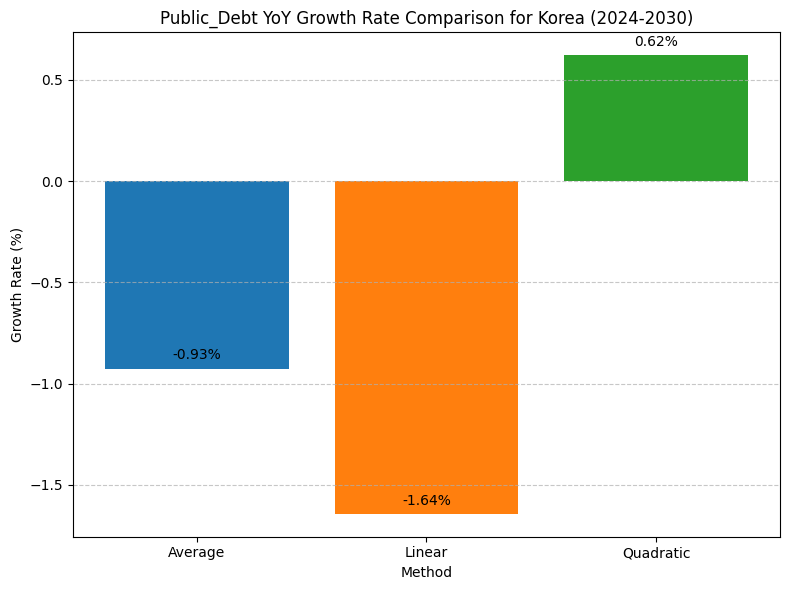

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prompt user for country
while True:
    user_input = input("Enter a country name to visualize Public_Debt growth rate differences (or 'quit' to exit): ").strip()
    if user_input.lower() == 'quit':
        print("Exiting.")
        break
    if user_input in countries:
        country = user_input
        break
    else:
        print(f"Country '{user_input}' not found. Available countries:")
        print(", ".join(sorted(countries)))

if user_input.lower() != 'quit':
    # Extract Public_Debt growth rates for the selected country
    growth_rates = {}
    for method, df_synth in synthetic_results.items():
        rate = df_synth[(df_synth['Country'] == country) & (df_synth['Year'] == 2024)]['Public_Debt']
        growth_rates[method] = rate.iloc[0] if not rate.empty and not pd.isna(rate.iloc[0]) else np.nan

    # Display table of growth rates
    print(f"\nPublic_Debt YoY Growth Rates for {country} (2024-2030):")
    table_data = pd.DataFrame({
        'Method': list(growth_rates.keys()),
        'Growth_Rate (%)': [f"{growth_rates[m]*100:.2f}" if not pd.isna(growth_rates[m]) else 'NaN' for m in growth_rates]
    })
    print(table_data.to_string(index=False))

    # Plot bar chart
    plt.figure(figsize=(8, 6))
    methods = [m for m in growth_rates if not pd.isna(growth_rates[m])]
    rates = [growth_rates[m] * 100 for m in methods]  # Convert to percentage
    plt.bar(methods, rates, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title(f'Public_Debt YoY Growth Rate Comparison for {country} (2024-2030)')
    plt.xlabel('Method')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    for i, rate in enumerate(rates):
        plt.text(i, rate + 0.05 * max(rates, default=0), f'{rate:.2f}%', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

Enter a country name to visualize Public_Debt growth rate time series (or 'quit' to exit): KOrea
Country 'KOrea' not found. Available countries:
Australia, Austria, Belgium, Canada, Chile, Colombia, Costa Rica, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Japan, Korea, Latvia, Lithuania, Luxembourg, Mexico, Netherlands, New Zealand, Norway, Poland, Portugal, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, United Kingdom, United States
Enter a country name to visualize Public_Debt growth rate time series (or 'quit' to exit): Korea

Projected Public_Debt YoY Growth Rates for Korea (2020-2030):
   Method Growth_Rate (%)
  Average           -0.93
   Linear           -1.64
Quadratic            0.62


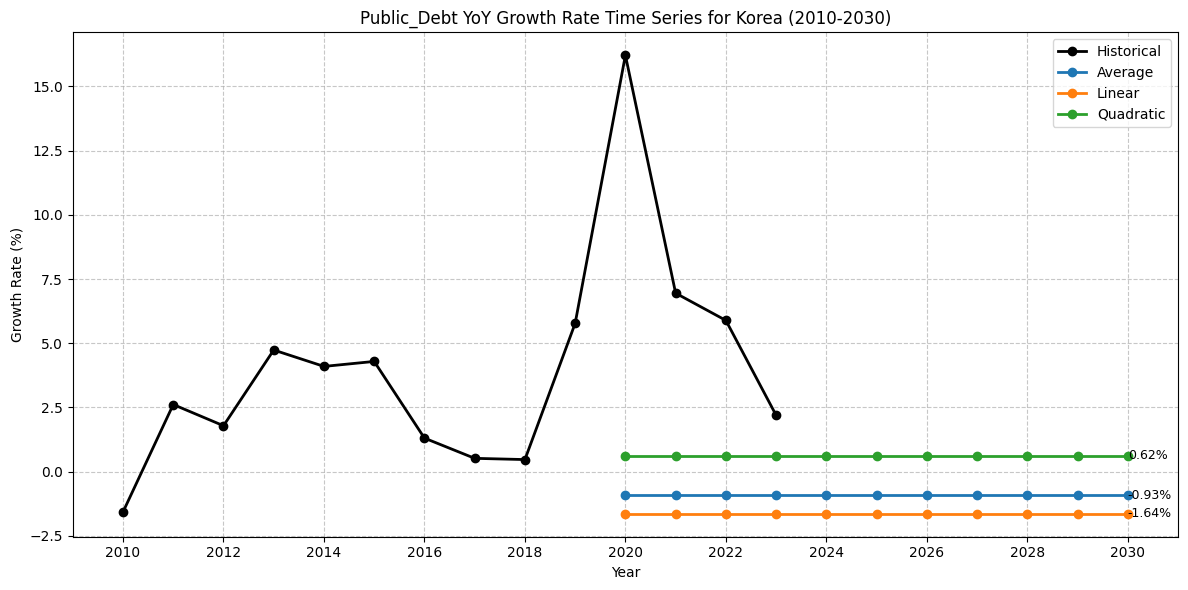

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prompt user for country
while True:
    user_input = input("Enter a country name to visualize Public_Debt growth rate time series (or 'quit' to exit): ").strip()
    if user_input.lower() == 'quit':
        print("Exiting.")
        break
    if user_input in countries:
        country = user_input
        break
    else:
        print(f"Country '{user_input}' not found. Available countries:")
        print(", ".join(sorted(countries)))

if user_input.lower() != 'quit':
    # Extract historical Public_Debt growth rates (2010-2023)
    historical_data = df_actual[(df_actual['Country'] == country) &
                               (df_actual['Year'].between(2010, 2023))][['Year', 'Public_Debt']]
    historical_series = historical_data.set_index('Year')['Public_Debt'] if not historical_data.empty else pd.Series(np.nan, index=range(2010, 2024))

    # Extract projected Public_Debt growth rates (2024-2030)
    projected_data = {}
    for method, df_synth in synthetic_results.items():
        data = df_synth[(df_synth['Country'] == country) &
                        (df_synth['Year'].between(2020, 2030))][['Year', 'Public_Debt']]
        projected_data[method] = data.set_index('Year')['Public_Debt'] if not data.empty and not data['Public_Debt'].isna().all() else pd.Series(np.nan, index=range(2024, 2031))

    # Display table of projected growth rates (2024-2030, constant per method)
    print(f"\nProjected Public_Debt YoY Growth Rates for {country} (2020-2030):")
    table_data = pd.DataFrame({
        'Method': list(projected_data.keys()),
        'Growth_Rate (%)': [f"{projected_data[m].mean()*100:.2f}" if not projected_data[m].isna().all() else 'NaN'
                            for m in projected_data]
    })
    print(table_data.to_string(index=False))

    # Plot time series
    plt.figure(figsize=(12, 6))
    # Historical data (2010-2023)
    if not historical_series.isna().all():
        plt.plot(historical_series.index, historical_series * 100, marker='o', label='Historical', color='black', linewidth=2)

    # Projected data (2024-2030)
    for method, rates in projected_data.items():
        if not rates.isna().all():
            plt.plot(rates.index, rates * 100, marker='o', label=method, linewidth=2)

    plt.title(f'Public_Debt YoY Growth Rate Time Series for {country} (2010-2030)')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.xticks(range(2010, 2031, 2))  # Every 2 years for readability
    # Label the last projected point (2030)
    for method, rates in projected_data.items():
        if not rates.isna().all() and not pd.isna(rates.iloc[-1]):
            plt.text(2030, rates.iloc[-1] * 100, f'{rates.iloc[-1]*100:.2f}%',
                     va='center', ha='left', fontsize=9)
    plt.tight_layout()
    plt.show()

In [45]:
#Create a dictionary of weights for different Periods
weights_dict = {
    'European': {
        'normal': {'Wage': -0.18, 'Exports': -0.179, 'GDP': -0.16, 'Imports': -0.1667, 'Population': -0.26,
                   'Unemployment': 0.2259, 'Labor_Force': -0.32, 'Current_Account': 0.0, 'Inflation': -0.21},
        'pandemic': {'Wage': 0.0, 'Exports': -0.83, 'GDP': -0.83, 'Imports': -0.79, 'Population': 0.0,
                     'Unemployment': 0.555, 'Labor_Force': -0.439, 'Current_Account': 0.0, 'Inflation': -0.54},
        'recovery': {'Wage': 0.0, 'Exports': -0.3387, 'GDP': 0.0, 'Imports': -0.31, 'Population': 0.0,
                     'Unemployment': 0.21, 'Labor_Force': 0.0, 'Current_Account': 0.0, 'Inflation': -0.27}
    },
    'Non_European': {
        'normal': {'Wage': 0.0, 'Exports': -0.1872, 'GDP': -0.384, 'Imports': -0.36, 'Population': 0.0,
                   'Unemployment': 0.27, 'Labor_Force': 0.0, 'Current_Account': 0.0, 'Inflation': -0.2342},
        'pandemic': {'Wage': 0.0, 'Exports': -0.736, 'GDP': -0.626, 'Imports': -0.59, 'Population': 0.49,
                     'Unemployment': 0.67, 'Labor_Force': 0.0, 'Current_Account': 0.0, 'Inflation': -0.259},
        'recovery': {'Wage': 0.0, 'Exports': -0.49, 'GDP': 0.0, 'Imports': -0.247, 'Population': -0.46,
                     'Unemployment': 0.53, 'Labor_Force': 0.0, 'Current_Account': 0.0, 'Inflation': -0.23}
    }
}

# Corrected function to normalize weights using absolute values
def normalize_weights(weights_dict):
    normalized_weights = {}
    for group in weights_dict:
        normalized_weights[group] = {}
        for period in weights_dict[group]:
            period_weights = weights_dict[group][period]
            # Sum of absolute weights (excluding Public_Debt if present)
            total = sum(abs(v) for k, v in period_weights.items() if k != 'Public_Debt')
            if total > 0:
                normalized_weights[group][period] = {
                    k: abs(v) / total if k != 'Public_Debt' else 0 for k, v in period_weights.items()
                }
            else:
                # Assign equal weights if sum of absolute weights is zero
                valid_factors = [k for k in period_weights if k != 'Public_Debt']
                equal_weight = 1.0 / len(valid_factors) if valid_factors else 0
                normalized_weights[group][period] = {
                    k: equal_weight if k != 'Public_Debt' else 0 for k in period_weights
                }
    return normalized_weights

# Apply normalization
weights = normalize_weights(weights_dict)

# Print normalized weights for verification
print("\nNormalized Weights:")
for group in weights:
    for period in weights[group]:
        print(f"{group} - {period}:")
        print({k: f"{v:.4f}" for k, v in weights[group][period].items()})
        print(f"Sum: {sum(v for k, v in weights[group][period].items() if k != 'Public_Debt'):.4f}\n")


Normalized Weights:
European - normal:
{'Wage': '0.1058', 'Exports': '0.1052', 'GDP': '0.0940', 'Imports': '0.0980', 'Population': '0.1528', 'Unemployment': '0.1328', 'Labor_Force': '0.1881', 'Current_Account': '0.0000', 'Inflation': '0.1234'}
Sum: 1.0000

European - pandemic:
{'Wage': '0.0000', 'Exports': '0.2083', 'GDP': '0.2083', 'Imports': '0.1983', 'Population': '0.0000', 'Unemployment': '0.1393', 'Labor_Force': '0.1102', 'Current_Account': '0.0000', 'Inflation': '0.1355'}
Sum: 1.0000

European - recovery:
{'Wage': '0.0000', 'Exports': '0.3001', 'GDP': '0.0000', 'Imports': '0.2747', 'Population': '0.0000', 'Unemployment': '0.1861', 'Labor_Force': '0.0000', 'Current_Account': '0.0000', 'Inflation': '0.2392'}
Sum: 1.0000

Non_European - normal:
{'Wage': '0.0000', 'Exports': '0.1304', 'GDP': '0.2675', 'Imports': '0.2508', 'Population': '0.0000', 'Unemployment': '0.1881', 'Labor_Force': '0.0000', 'Current_Account': '0.0000', 'Inflation': '0.1632'}
Sum: 1.0000

Non_European - pandemic

In [46]:
#Convert 2010-2023 actual data to long format and merge
df_actual = None
for factor, df in datasets.items():
    df_long = df.melt(id_vars=["Country"], var_name="Year", value_name=factor)
    df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
    df_long[factor] = pd.to_numeric(df_long[factor], errors='coerce')
    df_long = df_long[df_long["Year"].between(2010, 2023)].dropna(subset=[factor])

    if df_actual is None:
        df_actual = df_long
    else:
        df_actual = pd.merge(df_actual, df_long[['Country', 'Year', factor]],
                            on=['Country', 'Year'], how='inner')

#Calculate averages for different periods
# Normal period (2014-2019)
df_normal = df_actual[df_actual["Year"].between(2014, 2019)]
# Pandemic period (2020-2021)
df_pandemic = df_actual[df_actual["Year"].between(2020, 2021)]
# Recovery period (2022-2023)
df_recovery = df_actual[df_actual["Year"].between(2022, 2023)]

#Calculate average YoY growth rates for each period and country
def calculate_period_averages(df_period, period_name):
    avg_rates = {}
    countries = df_actual['Country'].unique()
    for country in countries:
        avg_rates[country] = {}
        country_data = df_period[df_period['Country'] == country]
        for factor in datasets.keys():
            avg = country_data[factor].mean()
            avg_rates[country][factor] = avg if not np.isnan(avg) else np.nan
    return avg_rates

avg_yoy_normal = calculate_period_averages(df_normal, "2014-2019")
avg_yoy_pandemic = calculate_period_averages(df_pandemic, "2020-2021")
avg_yoy_recovery = calculate_period_averages(df_recovery, "2022-2023")

#Project synthetic data for 2024-2030
synthetic_data = []
countries = df_actual['Country'].unique()

for country in countries:
    country_2023 = df_actual[(df_actual['Country'] == country) &
                            (df_actual['Year'] == 2023)]
    if country_2023.empty:
        print(f"Skipping {country}: No 2023 data available")
        continue

    if country in european_oecd_countries:
        group = 'European'
    else:
        group = 'Non_European'

    # Get weights for this group
    group_weights = weights[group]
    periods = {
        2024: avg_yoy_normal,
        2025: avg_yoy_normal,
        2026: avg_yoy_pandemic,
        2027: avg_yoy_pandemic,
        2028: avg_yoy_recovery,
        2029: avg_yoy_recovery,
        2030: avg_yoy_normal
    }

    for year, avg_yoy_rates in periods.items():
        row = {'Country': country, 'Year': year}
        # Compute Public_Debt growth rate using weighted average YoY growth rates
        public_debt_growth_rate = 0
        for factor in datasets.keys():
            if factor == 'Public_Debt':
                continue
#Convert 2010-2023 actual data to long format and merge
df_actual = None
for factor, df in datasets.items():
    df_long = df.melt(id_vars=["Country"], var_name="Year", value_name=factor)
    df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
    df_long[factor] = pd.to_numeric(df_long[factor], errors='coerce')
    df_long = df_long[df_long["Year"].between(2010, 2023)].dropna(subset=[factor])

    if df_actual is None:
        df_actual = df_long
    else:
        df_actual = pd.merge(df_actual, df_long[['Country', 'Year', factor]],
                            on=['Country', 'Year'], how='inner')

#Calculate averages for different periods
# Normal period (2014-2019)
df_normal = df_actual[df_actual["Year"].between(2014, 2019)]
# Pandemic period (2020-2021)
df_pandemic = df_actual[df_actual["Year"].between(2020, 2021)]
# Recovery period (2022-2023)
df_recovery = df_actual[df_actual["Year"].between(2022, 2023)]

#Calculate average YoY growth rates for each period and country
def calculate_period_averages(df_period, period_name):
    avg_rates = {}
    countries = df_actual['Country'].unique()
    for country in countries:
        avg_rates[country] = {}
        country_data = df_period[df_period['Country'] == country]
        for factor in datasets.keys():
            avg = country_data[factor].mean()
            avg_rates[country][factor] = avg if not np.isnan(avg) else np.nan
    return avg_rates

avg_yoy_normal = calculate_period_averages(df_normal, "2014-2019")
avg_yoy_pandemic = calculate_period_averages(df_pandemic, "2020-2021")
avg_yoy_recovery = calculate_period_averages(df_recovery, "2022-2023")

#Project synthetic data for 2024-2030
synthetic_data = []
countries = df_actual['Country'].unique()

for country in countries:
    country_2023 = df_actual[(df_actual['Country'] == country) &
                            (df_actual['Year'] == 2023)]
    if country_2023.empty:
        print(f"Skipping {country}: No 2023 data available")
        continue

    if country in european_oecd_countries:
        group = 'European'
    else:
        group = 'Non_European'

    # Get weights for this group
    group_weights = weights[group]
    periods = {
        2024: avg_yoy_normal,
        2025: avg_yoy_normal,
        2026: avg_yoy_pandemic,
        2027: avg_yoy_pandemic,
        2028: avg_yoy_recovery,
        2029: avg_yoy_recovery,
        2030: avg_yoy_normal
    }

    for year, avg_yoy_rates in periods.items():
        row = {'Country': country, 'Year': year}
        # Compute Public_Debt growth rate using weighted average YoY growth rates
        public_debt_growth_rate = 0
        valid_factors = 0
        for factor in datasets.keys():
            if factor == 'Public_Debt':
                continue
            # Access the correct period weights within group_weights
            weight = weights[group]['normal'].get(factor, 0) if year in [2024, 2025, 2030] else 0
            if year in [2026, 2027]:
                weight = weights[group]['pandemic'].get(factor, 0)
            elif year in [2028, 2029]:
                weight = weights[group]['recovery'].get(factor, 0)
            avg_yoy = avg_yoy_rates[country].get(factor, np.nan)
            if not np.isnan(avg_yoy):
                public_debt_growth_rate += weight * avg_yoy
                valid_factors += 1

        for factor in datasets.keys():
            if factor == 'Public_Debt':
                row[factor] = public_debt_growth_rate if valid_factors > 0 else np.nan
            else:
                avg_yoy = avg_yoy_rates[country].get(factor, np.nan)
                row[factor] = avg_yoy if not np.isnan(avg_yoy) else np.nan
        synthetic_data.append(row)

# Create synthetic DataFrame
df_synthetic_disease = pd.DataFrame(synthetic_data)

In [47]:
print("\nRanking of Countries by Average Public Debt Growth Rate (2024-2030):")
ranking_data = df_synthetic_disease.groupby('Country')['Public_Debt'].mean().reset_index()
ranking_data = ranking_data.rename(columns={'Public_Debt': 'Avg_Public_Debt_Growth_Rate'})
ranking_data = ranking_data.dropna()
ranking_data = ranking_data.sort_values(by='Avg_Public_Debt_Growth_Rate', ascending=False)
ranking_data['Rank'] = ranking_data['Avg_Public_Debt_Growth_Rate'].rank(ascending=False, method='min').astype(int)
ranking_data = ranking_data[['Rank', 'Country', 'Avg_Public_Debt_Growth_Rate']]
ranking_data['Avg_Public_Debt_Growth_Rate'] = ranking_data['Avg_Public_Debt_Growth_Rate'].apply(lambda x: f"{x*100:.2f}%")
print(ranking_data.to_string(index=False))


Ranking of Countries by Average Public Debt Growth Rate (2024-2030):
 Rank         Country Avg_Public_Debt_Growth_Rate
    1       Lithuania                       5.38%
    2         Estonia                       5.16%
    3          Latvia                       4.94%
    4         Iceland                       4.91%
    5          Norway                       4.23%
    6           Chile                       3.80%
    7         Hungary                       3.62%
    8          Poland                       3.51%
    9      Costa Rica                       3.41%
   10         Ireland                       3.37%
   11         Denmark                       3.08%
   12         Austria                       3.04%
   13   United States                       3.04%
   14      Luxembourg                       2.98%
   15          Greece                       2.77%
   16          Sweden                       2.63%
   17 Slovak Republic                       2.60%
   18        Slovenia         

Enter country name: Korea


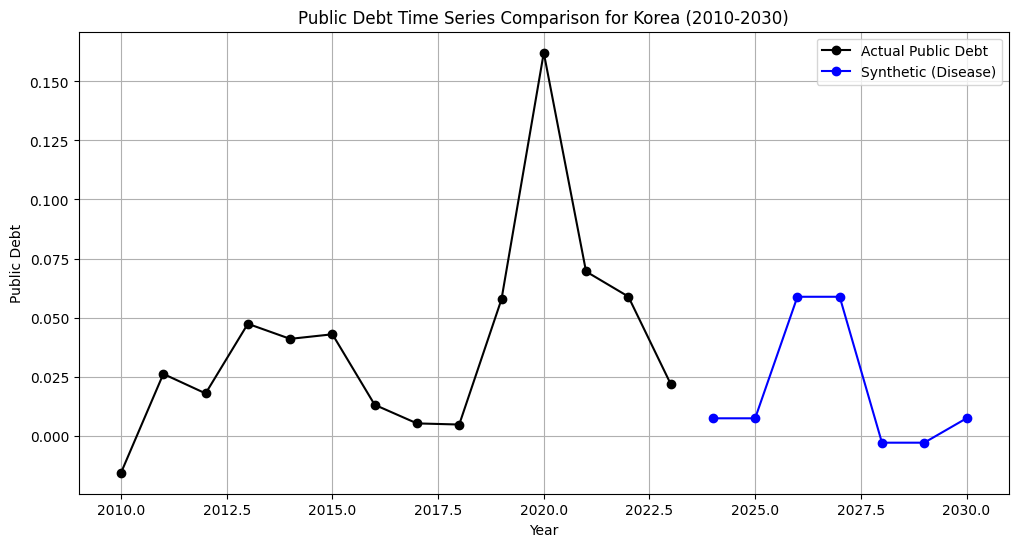

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_actual and df_synthetic_disease are available
def plot_compare_synthetic_public_debt(df_actual, df_synthetic_disease, country):
    # Filter actual data (2010-2023) for Public_Debt
    actual_debt = df_actual[df_actual['Country'] == country][['Year', 'Public_Debt']].dropna()

    # Filter synthetic data (2024-2030) for Public_Debt
    synthetic_disease = df_synthetic_disease[df_synthetic_disease['Country'] == country][['Year', 'Public_Debt']].dropna()

    # Check if data is available
    if actual_debt.empty and synthetic_disease.empty:
        print(f"No Public_Debt data available for {country}")
        return

    # Sort by year
    actual_debt = actual_debt.sort_values('Year')
    synthetic_disease = synthetic_disease.sort_values('Year')

    # Plot time series
    plt.figure(figsize=(12, 6))

    # Plot actual data (2010-2023) in black
    if not actual_debt.empty:
        plt.plot(actual_debt['Year'], actual_debt['Public_Debt'], label='Actual Public Debt', marker='o', color='black')

    # Plot synthetic data (2024-2030)
    if not synthetic_disease.empty:
        plt.plot(synthetic_disease['Year'], synthetic_disease['Public_Debt'], label='Synthetic (Disease)', marker='o', color='blue')

    plt.title(f'Public Debt Time Series Comparison for {country} (2010-2030)')
    plt.xlabel('Year')
    plt.ylabel('Public Debt')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'public_debt_timeseries_{country.replace(" ", "_")}.png')
    plt.show()

# Example: User selects a country
selected_country = input("Enter country name: ")  # e.g., "United States"
plot_compare_synthetic_public_debt(df_actual, df_synthetic_disease, selected_country)

In [49]:
#Convert 2010-2023 actual data to long format and merge
df_actual = None
for factor, df in datasets.items():
    df_long = df.melt(id_vars=["Country"], var_name="Year", value_name=factor)
    df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
    df_long[factor] = pd.to_numeric(df_long[factor], errors='coerce')
    df_long = df_long[df_long["Year"].between(2010, 2023)].dropna(subset=[factor])

    if df_actual is None:
        df_actual = df_long
    else:
        df_actual = pd.merge(df_actual, df_long[['Country', 'Year', factor]],
                            on=['Country', 'Year'], how='inner')

#Split historical data into periods
df_normal = df_actual[df_actual["Year"].between(2014, 2019)]  # Normal period
df_pandemic = df_actual[df_actual["Year"].between(2020, 2021)]  # Pandemic period
df_recovery = df_actual[df_actual["Year"].between(2022, 2023)]  # Recovery period

#Project synthetic data for 2024-2030 using linear regression for each period
synthetic_data = []
countries = df_actual['Country'].unique()

#Define periods and corresponding future years
periods = {
    'normal': {'data': df_normal, 'years': [2024, 2025, 2030]},
    'pandemic': {'data': df_pandemic, 'years': [2026, 2027]},
    'recovery': {'data': df_recovery, 'years': [2028, 2029]}
}

for country in countries:
    # Check if 2023 data exists as a reference point
    country_2023 = df_actual[(df_actual['Country'] == country) & (df_actual['Year'] == 2023)]
    if country_2023.empty:
        print(f"Skipping {country}: No 2023 data available")
        continue

    if country in european_oecd_countries:
        group = 'European'
    else:
        group = 'Non_European'
    group_weights = weights[group]

    # Store YoY growth rates for each period
    period_yoy_rates = {period: {} for period in periods}

    # Fit linear regression for each period to estimate YoY growth rates
    for period_name, period_info in periods.items():
        period_data = period_info['data']
        country_data = period_data[period_data['Country'] == country]

        if country_data.empty:
            print(f"Skipping {country} for {period_name} period: No data available")
            for factor in datasets.keys():
                period_yoy_rates[period_name][factor] = np.nan
            continue

        X = country_data['Year'].values.reshape(-1, 1)

        for factor in datasets.keys():
            y = country_data[factor].values
            if len(y) < 2:  # Need at least 2 points for linear regression
                period_yoy_rates[period_name][factor] = np.nan
                continue

            # Fit linear regression model
            try:
                model = LinearRegression()
                model.fit(X, y)
                # Predict for the last year of the period and one year beyond
                last_year = X[-1][0]
                predict_years = np.array([[last_year], [last_year + 1]])
                predicted_values = model.predict(predict_years)
                # Calculate YoY growth rate: (next_year - last_year) / last_year
                if predicted_values[0] != 0:
                    yoy_growth = (predicted_values[1] - predicted_values[0]) / predicted_values[0]
                    period_yoy_rates[period_name][factor] = yoy_growth if not np.isnan(yoy_growth) else np.nan
                else:
                    period_yoy_rates[period_name][factor] = np.nan
            except:
                period_yoy_rates[period_name][factor] = np.nan

    # Project synthetic data for 2024-2030
    for year in range(2024, 2031):
        row = {'Country': country, 'Year': year}
        # Determine which period applies to this year
        period_name = None
        for p_name, p_info in periods.items():
            if year in p_info['years']:
                period_name = p_name
                break

        if period_name is None:
            print(f"Warning: No period defined for year {year} for {country}")
            continue

        # Compute Public_Debt growth rate using weighted YoY growth rates
        public_debt_growth_rate = 0
        for factor in datasets.keys():
            if factor == 'Public_Debt':
                continue
            yoy_rate = period_yoy_rates[period_name].get(factor, np.nan)
            row[factor] = yoy_rate if not np.isnan(yoy_rate) else np.nan
            if not np.isnan(yoy_rate):
                #Change to access weights using correct nested structure
                weight = group_weights.get(period_name, {}).get(factor, 0)
                public_debt_growth_rate += weight * yoy_rate

        row['Public_Debt'] = public_debt_growth_rate if not np.isnan(public_debt_growth_rate) else np.nan
        synthetic_data.append(row)

# Create synthetic DataFrame
df_synthetic_linear_disease = pd.DataFrame(synthetic_data)

# Sort by Country and Year for consistency
df_synthetic_linear_disease = df_synthetic_linear_disease.sort_values(['Country', 'Year'])

# Print synthetic data for inspection
print("\nSynthetic Data (2024-2030):")
print(df_synthetic_linear_disease.to_string(index=False))


Synthetic Data (2024-2030):
        Country  Year    Exports       GDP    Imports  Population  Unemployment  Labor_Force  Current_Account  Inflation      Wage  Public_Debt
      Australia  2024   0.340749  0.561286   0.480824    0.003447      0.299994     0.082725         0.254249  -0.044406  0.064471     0.364370
      Australia  2025   0.340749  0.561286   0.480824    0.003447      0.299994     0.082725         0.254249  -0.044406  0.064471     0.364370
      Australia  2026   1.678473  1.249609   3.949691   -7.754232      2.211248     1.029692        -8.268501   0.704284 -1.013352     0.656274
      Australia  2027   1.678473  1.249609   3.949691   -7.754232      2.211248     1.029692        -8.268501   0.704284 -1.013352     0.656274
      Australia  2028  -2.536711 -2.520833  -0.974659    0.479993    -29.106903     0.360338        -0.022127  -0.178145 -0.275514    -8.549088
      Australia  2029  -2.536711 -2.520833  -0.974659    0.479993    -29.106903     0.360338        -0.0221

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_actual, df_synthetic_disease, df_synthetic_linear_disease, df_synthetic_quadratic_disease are available
def plot_compare_synthetic_public_debt(df_actual, df_synthetic_disease,  df_synthetic_linear_disease, country):
    # Filter actual data (2010-2023) for Public_Debt
    actual_debt = df_actual[df_actual['Country'] == country][['Year', 'Public_Debt']].dropna()

    # Filter synthetic data (2024-2030) for Public_Debt
    synthetic_disease = df_synthetic_disease[df_synthetic_disease['Country'] == country][['Year', 'Public_Debt']].dropna()
    synthetic_linear = df_synthetic_linear_disease[df_synthetic_linear_disease['Country'] == country][['Year', 'Public_Debt']].dropna()

    # Check if data is available
    if actual_debt.empty and synthetic_disease.empty and synthetic_linear.empty:
        print(f"No Public_Debt data available for {country}")
        return

    # Sort by year
    actual_debt = actual_debt.sort_values('Year')
    synthetic_disease = synthetic_disease.sort_values('Year')
    synthetic_linear = synthetic_linear.sort_values('Year')

    # Plot time series
    plt.figure(figsize=(12, 6))

    # Plot actual data (2010-2023) in black
    if not actual_debt.empty:
        plt.plot(actual_debt['Year'], actual_debt['Public_Debt'], label='Actual Public Debt', marker='o', color='black')

    # Plot synthetic data (2024-2030)
    if not synthetic_disease.empty:
        plt.plot(synthetic_disease['Year'], synthetic_disease['Public_Debt'], label='Synthetic (Disease)', marker='o', color='blue')


    if not synthetic_linear.empty:
        plt.plot(synthetic_linear['Year'], synthetic_linear['Public_Debt'], label='Synthetic (Linear)', marker='o', color='green')

    plt.title(f'Public Debt Time Series Comparison for {country} (2010-2030)')
    plt.xlabel('Year')
    plt.ylabel('Public Debt')
    plt.legend()
    plt.grid(True)
    plt.savefig('compare_public_debt_timeseries.png')

# Example: User selects a country
selected_country = input("Enter country name: ")  # e.g., "United States"
plot_compare_synthetic_public_debt(df_actual, df_synthetic_disease, df_synthetic_linear_disease, selected_country)

In [ ]:
debt_millions = pd.read_csv('/content/absolute_debt.csv')
debt_millions.head()